In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    num_salt = np.ceil(salt_prob * image.size)
    num_pepper = np.ceil(pepper_prob * image.size)


    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1


    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

salt_prob = 0.05
pepper_prob = 0.05

X_train_noisy = np.array([add_salt_and_pepper_noise(img, salt_prob, pepper_prob) for img in X_train])
X_test_noisy = np.array([add_salt_and_pepper_noise(img, salt_prob, pepper_prob) for img in X_test])

In [17]:
path = '/content/drive/MyDrive/Noisy mnist/'

np.save(path + 'X_train_noisy.npy', X_train_noisy)
np.save(path + 'y_train.npy', y_train)
np.save(path + 'X_test_noisy.npy', X_test_noisy)
np.save(path + 'y_test.npy', y_test)

print("Noisy dataset saved to Google Drive.")

Noisy dataset saved to Google Drive.


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(28, 28, 1))

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose # Import Conv2DTranspose

input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x) # Now Conv2DTranspose is defined

In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_test_noisy = X_test_noisy.reshape(-1, 28, 28, 1)

In [9]:
autoencoder.fit(X_train_noisy, X_train, epochs=20, batch_size=128, validation_data=(X_test_noisy, X_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.1768 - val_loss: 0.0775
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0773 - val_loss: 0.0745
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0743 - val_loss: 0.0726
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0727 - val_loss: 0.0717
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0714 - val_loss: 0.0704
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0706 - val_loss: 0.0696
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0699 - val_loss: 0.0691
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0694 - val_loss: 0.0686
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0687 - val_loss: 0.0682
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0684 - val_loss: 0.0678
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 12/20
469/469 ━━━━━━━━━━━━━

In [10]:
decoded_imgs = autoencoder.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


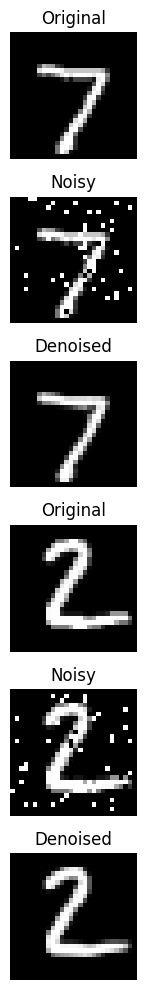

In [13]:
import matplotlib.pyplot as plt

n = 2
plt.figure(figsize=(5, 10))
for i in range(n):

    ax = plt.subplot(3 * n, 1, i * 3 + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')


    ax = plt.subplot(3 * n, 1, i * 3 + 2)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')


    ax = plt.subplot(3 * n, 1, i * 3 + 3)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import accuracy_score

decoded_imgs_binary = (decoded_imgs > 0.5).astype(int)
X_test_binary = (X_test > 0.5).astype(int)

accuracy = accuracy_score(X_test_binary.flatten(), decoded_imgs_binary.flatten())
print(f"Accuracy between original and denoised images: {accuracy*100}")

Accuracy between original and denoised images: 98.780625
